Chris Chen

Please conduct Descriptive/Predictive/Prescriptive Analysis with the attached sample data.

1.           Data management/ETL,

2.           Data augmentation (linear/non-linear properties),

3.           Descriptive statistics (4 moments) and distribution characteristics (normal, lognormal, gamma etc.) of the target variable,

4.           Correlation Analysis and/or Principle Component Analysis (PCA),

5.           Feature selection,

6.           Time series/cross sectional modeling (Regressions/Classifications),

7.           Cross validation,

8.           Model selection via backtesting performance in Economic terms (PnL, Max Drawdown, Expected Gain and Loss etc.) and Statistical terms (R2, MSE/MAE, Recall and Precision, confusion matrix etc.).

Steps mentioned above are provided as a rough guideline and not needed to be followed exactly so feel free to add/skip steps as needed.

 

We will evaluate programming approach, for sustainability purposes meaning it should be able to handle new data as data is updated/replaced or added/removed.

 

Python is the preferred language. Please copy and paste your code to a PDF file and also share your findings and commentaries in PPT presentation.



## Table of Contents:
1.           [Data management/ETL,](#zero-bullet)

2.           [Data augmentation (linear/non-linear properties),](#first-bullet)

3.           [Descriptive statistics (4 moments) and distribution characteristics (normal, lognormal, gamma etc.) of the target variable,](#second-bullet)

4.           [Correlation Analysis and/or Principle Component Analysis (PCA),](#bullet3)

5.           [Feature selection,](#bullet4)

6.           [Time series/cross sectional modeling (Regressions/Classifications),](#bullet5)

7.           [Cross validation,](#bullet6)

8.           [Model selection via backtesting performance in Economic terms (PnL, Max Drawdown, Expected Gain and Loss etc.) and Statistical terms (R2, MSE/MAE, Recall and Precision, confusion matrix etc.).
](#bullet7)

Import libraries

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import statsmodels.api as sm
import sklearn
import seaborn as sns
import pickle

In [118]:
import sys
!{sys.executable} -m pip install fitter



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for fitter: filename=fitter-1.5.2-py3-none-any.whl size=25608 sha256=5942cde988179dad6164131b507ce29f93dbc6d9299cc2ab18726d7d80d0f862
  Stored in directory: c:\users\chen5\appdata\local\pip\cache\wheels\2f\4b\12\1c9085f8ecb92805ca8645ab9c61703a2874685a9fb87b0bdb
Successfully built fitter


In [119]:
from fitter import Fitter, get_common_distributions, get_distributions

In [230]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA


In [254]:
from IPython.display import Image


In [ ]:
sns.set()

## Data management/ETL <a class="anchor" id="zero-bullet"></a>
Import data

In [4]:
data = pd.read_excel("POC Sample Data.xlsx")

In [5]:
data_original = data.copy()

In [4]:
data

DATETIME  WZ_Coast (BIDCLOSE_LOAD_FORECAST)  \
0    2022-01-01 01:00:00                         10307.0996   
1    2022-01-01 02:00:00                         10300.2002   
2    2022-01-01 03:00:00                         10313.0000   
3    2022-01-01 04:00:00                         10253.7998   
4    2022-01-01 05:00:00                         10206.0996   
...                  ...                                ...   
5514 2022-08-18 20:00:00                         17824.6992   
5515 2022-08-18 21:00:00                         17434.3008   
5516 2022-08-18 22:00:00                         16821.0996   
5517 2022-08-18 23:00:00                         15956.9004   
5518 2022-08-19 00:00:00                         15032.0000   

      WZ_ERCOT (BIDCLOSE_LOAD_FORECAST)  WZ_East (BIDCLOSE_LOAD_FORECAST)  \
0                            37308.3496                         1282.5200   
1                            36984.0036                         1260.6400   
2                            36764.8666                         1245.8400   
3                            36163.0723                         1214.4100   
4                            35615.0476                         1185.4000   
...                                 ...                               ...   
5514                         66123.3203                         2423.1001   
5515                         64306.1697                         2361.8899   
5516                         62122.4999                         2269.7400   
5517                         58237.7999                         2105.7700   
5518                         54260.6896                         1934.1400   

      WZ_FarWest (BIDCLOSE_LOAD_FORECAST)  WZ_North (BIDCLOSE_LOAD_FORECAST)  \
0                               3657.7300                           819.6300   
1                               3660.2400                           759.2540   
2                               3668.4399                           725.9070   
3                               3673.6001                           720.7120   
4                               3668.7000                           704.3080   
...                                   ...                                ...   
5514                            5083.8301                          1667.6200   
5515                            5064.5200                          1606.4800   
5516                            5067.2598                          1553.4200   
5517                            4939.5898                          1447.1500   
5518                            4822.8301                          1342.9301   

      WZ_NorthCentral (BIDCLOSE_LOAD_FORECAST)  \
0                                   10433.5000   
1                                   10346.5996   
2                                   10346.5996   
3                                   10158.9004   
4                                   10016.0000   
...                                        ...   
5514                                20483.8008   
5515                                19751.1992   
5516                                18971.3008   
5517                                17435.5000   
5518                                15946.5000   

      WZ_SouthCentral (BIDCLOSE_LOAD_FORECAST)  \
0                                    6365.8901   
1                                    6287.0098   
2                                    6146.4502   
3                                    5922.2500   
4                                    5733.7900   
...                                        ...   
5514                                11839.7002   
5515                                11435.0000   
5516                                10973.2998   
5517                                10213.7998   
5518                                 9412.5195   

      WZ_Southern (BIDCLOSE_LOAD_FORECAST)  WZ_West (BIDCLOSE_LOAD_FORECAST)  \
0                                2852.1899                         1589.7900   
1          

In [6]:
features = pd.read_excel("POC Sample Data.xlsx",sheet_name=1)

In [6]:
features

Unnamed: 0 Known Y/N Solving For Actual  \
0          WZ_Coast (BIDCLOSE_LOAD_FORECAST)         Y         NaN    NaN   
1          WZ_ERCOT (BIDCLOSE_LOAD_FORECAST)         Y         NaN    NaN   
2           WZ_East (BIDCLOSE_LOAD_FORECAST)         Y         NaN    NaN   
3        WZ_FarWest (BIDCLOSE_LOAD_FORECAST)         Y         NaN    NaN   
4          WZ_North (BIDCLOSE_LOAD_FORECAST)         Y         NaN    NaN   
5   WZ_NorthCentral (BIDCLOSE_LOAD_FORECAST)         Y         NaN    NaN   
6   WZ_SouthCentral (BIDCLOSE_LOAD_FORECAST)         Y         NaN    NaN   
7       WZ_Southern (BIDCLOSE_LOAD_FORECAST)         Y         NaN    NaN   
8           WZ_West (BIDCLOSE_LOAD_FORECAST)         Y         NaN    NaN   
9                ERCOT (WIND_STWPF_BIDCLOSE)         Y         NaN    NaN   
10          GR_COASTAL (WIND_STWPF_BIDCLOSE)         Y         NaN    NaN   
11            GR_ERCOT (WIND_STWPF_BIDCLOSE)         Y         NaN    NaN   
12            GR_NORTH (WIND_STWPF_BIDCLOSE)         Y         NaN    NaN   
13        GR_PANHANDLE (WIND_STWPF_BIDCLOSE)         Y         NaN    NaN   
14            GR_SOUTH (WIND_STWPF_BIDCLOSE)         Y         NaN    NaN   
15             GR_WEST (WIND_STWPF_BIDCLOSE)         Y         NaN    NaN   
16       NORTH (ERCOT) (WIND_STWPF_BIDCLOSE)         Y         NaN    NaN   
17       SOUTH_HOUSTON (WIND_STWPF_BIDCLOSE)         Y         NaN    NaN   
18        WEST (ERCOT) (WIND_STWPF_BIDCLOSE)         Y         NaN    NaN   
19          WEST_NORTH (WIND_STWPF_BIDCLOSE)         Y         NaN    NaN   
20              ERCOT (SOLAR_STPPF_BIDCLOSE)         Y         NaN    NaN   
21            ERCOT (TOTAL_RESOURCE_CAP_OUT)         Y         NaN    NaN   
22                           Katy (GASPRICE)         Y         NaN    NaN   
23                          Henry (GASPRICE)         Y         NaN    NaN   
24                          HB_NORTH (DALMP)       NaN           x    NaN   
25                          HB_NORTH (RTLMP)       NaN           x    NaN   
26                         WZ_Coast (RTLOAD)       NaN         NaN      x   
27                         WZ_ERCOT (RTLOAD)       NaN         NaN      x   
28                          WZ_East (RTLOAD)       NaN         NaN      x   
29                       WZ_FarWest (RTLOAD)       NaN         NaN      x   
30                         WZ_North (RTLOAD)       NaN         NaN      x   
31                  WZ_NorthCentral (RTLOAD)       NaN         NaN      x   
32                  WZ_SouthCentral (RTLOAD)       NaN         NaN      x   
33                      WZ_Southern (RTLOAD)       NaN         NaN      x   
34                          WZ_West (RTLOAD)       NaN         NaN      x   
35                     GR_COASTAL (WINDDATA)       NaN         NaN      x   
36                       GR_ERCOT (WINDDATA)       NaN         NaN      x   
37                       GR_NORTH (WINDDATA)       NaN         NaN      x   
38                   GR_PANHANDLE (WINDDATA)       NaN         NaN      x   
39                       GR_SOUTH (WINDDATA)       NaN         NaN      x   
40                        GR_WEST (WINDDATA)       NaN         NaN      x   
41               ERCOT (GENERATION_SOLAR_RT)       NaN         NaN      x   

      Feature Type  
0           Demand  
1           Demand  
2           Demand  
3           Demand  
4           Demand  
5           Demand  
6           Demand  
7           Demand  
8           Demand  
9             Wind  
10            Wind  
11            Wind  
12            Wind  
13            Wind  
14            Wind  
15            Wind  
16            Wind  
17            Wind  
18            Wind  
19            Wind  
20           Solar  
21         Outages  
22      Fuel Price  
23      Fuel Price  
24  DayAhead Price  
25        Rt Price  
26          Demand  
27          Demand  
28          Demand  
29          Demand  
30          Demand  
31          Demand  
32          Demand  
33      

Full data until "8/15/2022 12:00" row 5436 (5434)

In [7]:
data = data.drop(labels = "PEAKTYPE", axis = 1)

In [8]:
data[data.isnull().any(axis=1)]

DATETIME  WZ_Coast (BIDCLOSE_LOAD_FORECAST)  \
1703 2022-03-13 00:00:00                         11006.2002   
5278 2022-08-09 00:00:00                         15047.0000   
5279 2022-08-09 01:00:00                         14323.7002   
5280 2022-08-09 02:00:00                         13613.0996   
5281 2022-08-09 03:00:00                         13083.7002   
...                  ...                                ...   
5514 2022-08-18 20:00:00                         17824.6992   
5515 2022-08-18 21:00:00                         17434.3008   
5516 2022-08-18 22:00:00                         16821.0996   
5517 2022-08-18 23:00:00                         15956.9004   
5518 2022-08-19 00:00:00                         15032.0000   

      WZ_ERCOT (BIDCLOSE_LOAD_FORECAST)  WZ_East (BIDCLOSE_LOAD_FORECAST)  \
1703                         43109.8298                         1767.8300   
5278                         57698.7702                         2103.0701   
5279                         54345.5796                         1989.2200   
5280                         51251.9807                         1867.9900   
5281                         49071.2402                         1768.4200   
...                                 ...                               ...   
5514                         66123.3203                         2423.1001   
5515                         64306.1697                         2361.8899   
5516                         62122.4999                         2269.7400   
5517                         58237.7999                         2105.7700   
5518                         54260.6896                         1934.1400   

      WZ_FarWest (BIDCLOSE_LOAD_FORECAST)  WZ_North (BIDCLOSE_LOAD_FORECAST)  \
1703                            4514.2998                          1167.5000   
5278                            4996.5298                          1471.5699   
5279                            5041.0801                          1359.8700   
5280                            4967.2002                          1285.0500   
5281                            4902.7900                          1213.9900   
...                                   ...                                ...   
5514                            5083.8301                          1667.6200   
5515                            5064.5200                          1606.4800   
5516                            5067.2598                          1553.4200   
5517                            4939.5898                          1447.1500   
5518                            4822.8301                          1342.9301   

      WZ_NorthCentral (BIDCLOSE_LOAD_FORECAST)  \
1703                                12966.7998   
5278                                18383.0000   
5279                                17158.0996   
5280                                15984.4004   
5281                                15217.7002   
...                                        ...   
5514                                20483.8008   
5515                                19751.1992   
5516                                18971.3008   
5517                                17435.5000   
5518                                15946.5000   

      WZ_SouthCentral (BIDCLOSE_LOAD_FORECAST)  \
1703                                 6958.1201   
5278                                 9535.4502   
5279                                 8876.4297   
5280                                 8310.3604   
5281                                 7880.3198   
...                                        ...   
5514                                11839.7002   
5515                                11435.0000   
5516                                10973.2998   
5517                                10213.7998   
5518                                 9412.5195   

      WZ_Southern (BIDCLOSE_LOAD_FORECAST)  WZ_West (BIDCLOSE_LOAD_FORECAST)  \
1703                             3267.6599                         1461.4200   
5278       

"2022-03-13 00:00:00" missing actuals

Gas price data exists until "2022-08-09"

In [9]:
data_nonull = data.dropna()

In [17]:
data_nonull # 5277 rows

DATETIME  WZ_Coast (BIDCLOSE_LOAD_FORECAST)  \
0    2022-01-01 01:00:00                         10307.0996   
1    2022-01-01 02:00:00                         10300.2002   
2    2022-01-01 03:00:00                         10313.0000   
3    2022-01-01 04:00:00                         10253.7998   
4    2022-01-01 05:00:00                         10206.0996   
...                  ...                                ...   
5273 2022-08-08 19:00:00                         18827.3008   
5274 2022-08-08 20:00:00                         18121.3008   
5275 2022-08-08 21:00:00                         17679.5000   
5276 2022-08-08 22:00:00                         17003.0000   
5277 2022-08-08 23:00:00                         16050.4004   

      WZ_ERCOT (BIDCLOSE_LOAD_FORECAST)  WZ_East (BIDCLOSE_LOAD_FORECAST)  \
0                            37308.3496                         1282.5200   
1                            36984.0036                         1260.6400   
2                            36764.8666                         1245.8400   
3                            36163.0723                         1214.4100   
4                            35615.0476                         1185.4000   
...                                 ...                               ...   
5273                         73130.0215                         2856.0400   
5274                         70722.8204                         2742.5000   
5275                         68622.1793                         2628.1799   
5276                         66010.7299                         2487.7000   
5277                         61886.2297                         2289.6499   

      WZ_FarWest (BIDCLOSE_LOAD_FORECAST)  WZ_North (BIDCLOSE_LOAD_FORECAST)  \
0                               3657.7300                            819.630   
1                               3660.2400                            759.254   
2                               3668.4399                            725.907   
3                               3673.6001                            720.712   
4                               3668.7000                            704.308   
...                                   ...                                ...   
5273                            5309.8301                           1967.260   
5274                            5312.1401                           1885.280   
5275                            5282.1499                           1803.380   
5276                            5259.8701                           1729.160   
5277                            5128.8999                           1596.990   

      WZ_NorthCentral (BIDCLOSE_LOAD_FORECAST)  \
0                                   10433.5000   
1                                   10346.5996   
2                                   10346.5996   
3                                   10158.9004   
4                                   10016.0000   
...                                        ...   
5273                                23951.8008   
5274                                23161.1992   
5275                                22385.0996   
5276                                21514.0996   
5277                                19935.0000   

      WZ_SouthCentral (BIDCLOSE_LOAD_FORECAST)  \
0                                    6365.8901   
1                                    6287.0098   
2                                    6146.4502   
3                                    5922.2500   
4                                    5733.7900   
...                                        ...   
5273                                12652.5000   
5274                                12181.2002   
5275                                11714.7998   
5276                                11163.5000   
5277                                10346.5996   

      WZ_Southern (BIDCLOSE_LOAD_FORECAST)  WZ_West (BIDCLOSE_LOAD_FORECAST)  \
0                                2852.1899                         1589.7900   
1          

To do: SQL, demonstrate how to handle new data.

How would new data be presented? In Excel, or as a feed?

## Data augmentation (linear/non-linear properties), <a class="anchor" id="first-bullet"></a>


Polynomial, squared variables

Log variables/target

In [168]:
def logtransform(datacolumn):
    return np.log(datacolumn-min(datacolumn)+1)
def unlogtransform(transformedData, originalMin):
    return np.exp(transformedData)+originalMin-1


In [169]:
unlogtransform(logtransform(hbnorth_rtlmp),min(hbnorth_rtlmp))

0        64.3600
1        32.4475
2        25.5400
3        22.4175
4        15.9475
          ...   
5273    143.4175
5274    330.7100
5275    466.8200
5276    114.2575
5277     90.3750
Name: HB_NORTH (RTLMP), Length: 5277, dtype: float64

In [162]:
log_rtlmp = np.log(hbnorth_rtlmp-min(hbnorth_rtlmp)+1)

In [163]:
np.exp(log_rtlmp)+min(hbnorth_rtlmp)-1

0        64.3600
1        32.4475
2        25.5400
3        22.4175
4        15.9475
          ...   
5273    143.4175
5274    330.7100
5275    466.8200
5276    114.2575
5277     90.3750
Name: HB_NORTH (RTLMP), Length: 5277, dtype: float64

Or exponentiate

Differences/percentages/proportions of whole.

Sums/Totals

Transform target as RT-DA, and then to positive/negative binary variable - can use logistic/classification after

Include time series style predictors for cross-sectional regression:

lagged data (previous time) (or for one day before)

average of last day

Differenced data (in predictors)


Time series stationarity

## Descriptive statistics (4 moments) and distribution characteristics (normal, lognormal, gamma etc.) of the target variable, <a class="anchor" id="second-bullet"></a>

### North Hub DA LMP:

In [10]:
hbnorth_dalmp = data_nonull["HB_NORTH (DALMP)"]

statistics

In [39]:
stats.describe(hbnorth_dalmp)

DescribeResult(nobs=5277, minmax=(2.37, 2100.11), mean=65.10376350198976, variance=7997.701381019116, skewness=10.221531751065775, kurtosis=160.71832413594993)

In [80]:
np.std(hbnorth_dalmp) # standard deviation

89.42139455256226

distribution

[]

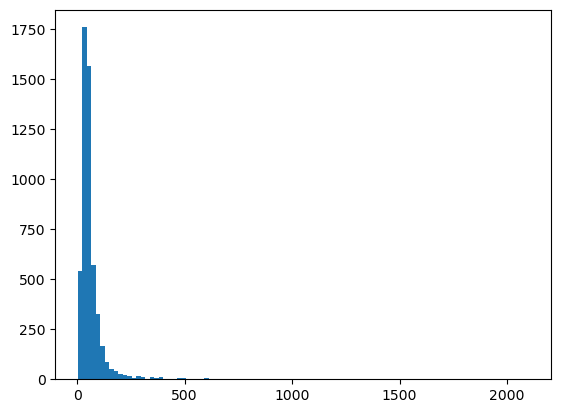

In [56]:
plt.hist(hbnorth_dalmp,bins = 100)
plt.plot()

[]

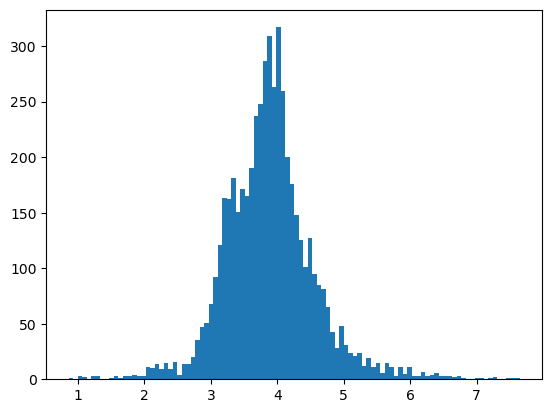

In [67]:
plt.hist(np.log(hbnorth_dalmp),bins = 100)
plt.plot()

#### Find distributions with Fitter
Reference: https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9

https://stackoverflow.com/questions/37487830/how-to-find-probability-distribution-and-parameters-for-real-data-python-3

Other references:
Goodness of fit, KS, QQ: https://towardsdatascience.com/identify-your-datas-distribution-d76062fc0802
With Minitab: https://statisticsbyjim.com/hypothesis-testing/identify-distribution-data/


In [139]:
get_common_distributions()

['cauchy',
 'chi2',
 'expon',
 'exponpow',
 'gamma',
 'lognorm',
 'norm',
 'powerlaw',
 'rayleigh',
 'uniform']

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.28it/s]


sumsquare_error           aic            bic  kl_div  ks_statistic  \
cauchy           0.000011   2315.065108 -105672.426905     inf      0.122231   
lognorm          0.000020   3315.830221 -102294.646970     inf      0.067046   
chi2             0.000071   6011.625945  -95639.107489     inf      0.129338   
expon            0.000169   4175.657136  -91061.594720     inf      0.186251   
rayleigh         0.000195  16359.206489  -90288.245482     inf      0.289725   

              ks_pvalue  
cauchy     3.623657e-69  
lognorm    4.551482e-21  
chi2       2.014626e-77  
expon     1.009660e-160  
rayleigh   0.000000e+00

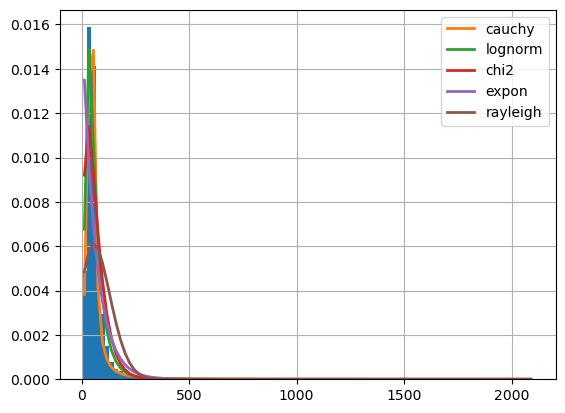

In [140]:
#https://fitter.readthedocs.io/en/latest/
f = Fitter(hbnorth_dalmp, distributions = get_common_distributions())
f.fit()
f.summary()


In [144]:
f.get_best(method = 'sumsquare_error')

{'cauchy': {'loc': 45.129559989445085, 'scale': 15.344231074831347}}

In [145]:
f.fitted_param["cauchy"]

(45.129559989445085, 15.344231074831347)

Try on log version of data

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 12.67it/s]


sumsquare_error         aic           bic  kl_div  ks_statistic  \
cauchy          0.392254  601.705168 -50151.081699     inf      0.063968   
lognorm         0.439803  938.300151 -49538.727244     inf      0.056514   
gamma           0.445457  941.614680 -49471.323817     inf      0.056922   
chi2            0.452792  937.365495 -49385.135587     inf      0.054711   
norm            0.472375  962.899610 -49170.281059     inf      0.066466   

            ks_pvalue  
cauchy   3.241987e-19  
lognorm  4.320587e-15  
gamma    2.648821e-15  
chi2     3.601935e-14  
norm     1.032366e-20

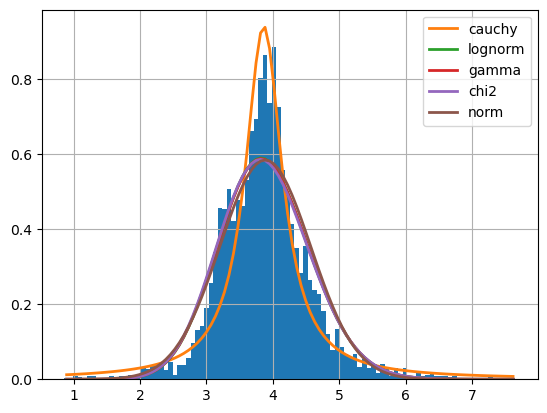

In [146]:
f = Fitter(np.log(hbnorth_dalmp), distributions = get_common_distributions())
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary()


In [147]:
f.get_best(method = 'sumsquare_error')

{'cauchy': {'loc': 3.862878279736262, 'scale': 0.33843600098132787}}

In [148]:
f.fitted_param["lognorm"]

(0.06222912235650792, -7.034238441223836, 10.899621808706431)

### North Hub RT LMP

Statistics for RT LMP:

In [11]:
hbnorth_rtlmp = data_nonull["HB_NORTH (RTLMP)"]

Mean

In [33]:
np.mean(hbnorth_rtlmp)

64.94989956414624

Variance, standard deviation

In [34]:
np.var(hbnorth_rtlmp)

41981.73903575835

In [35]:
np.std(hbnorth_rtlmp)

204.89445828464554

Skewness (3rd moment)

In [36]:
stats.skew(hbnorth_rtlmp)

17.0757146199265

Kurtosis (4th moment)

In [37]:
stats.kurtosis(hbnorth_rtlmp)

353.4059001338563

In [38]:
stats.describe(hbnorth_rtlmp)

DescribeResult(nobs=5277, minmax=(-29.695, 5365.8475), mean=64.94989956414629, variance=41989.696150814394, skewness=17.0757146199265, kurtosis=353.4059001338563)

Distribution:

[]

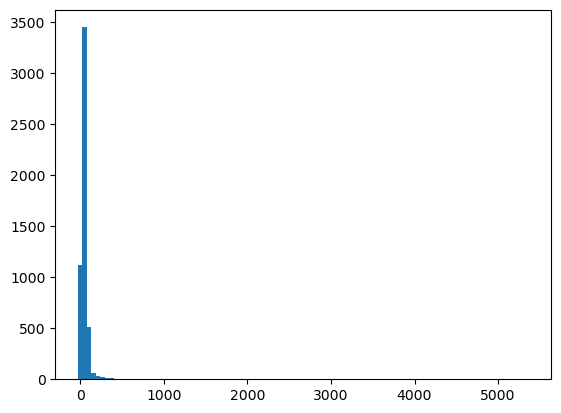

In [49]:
plt.hist(hbnorth_rtlmp,bins = 100)
plt.plot()

In [134]:
np.log(hbnorth_rtlmp)

0       4.164492
1       3.479623
2       3.240246
3       3.109842
4       2.769302
          ...   
5273    4.965760
5274    5.801242
5275    6.145944
5276    4.738455
5277    4.503968
Name: HB_NORTH (RTLMP), Length: 5277, dtype: float64

[]

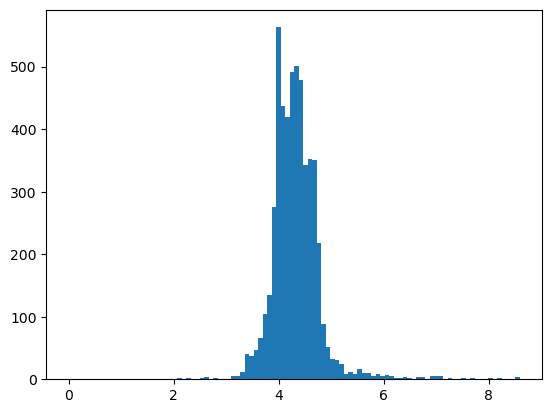

In [133]:
plt.hist(np.log(hbnorth_rtlmp-min(hbnorth_rtlmp)+1),bins = 100)
plt.plot()

May be lognormal?

#### Find distributions with Fitter
Reference: https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9

https://stackoverflow.com/questions/37487830/how-to-find-probability-distribution-and-parameters-for-real-data-python-3

Other references:
Goodness of fit, KS, QQ: https://towardsdatascience.com/identify-your-datas-distribution-d76062fc0802
With Minitab: https://statisticsbyjim.com/hypothesis-testing/identify-distribution-data/


In [139]:
get_common_distributions()

['cauchy',
 'chi2',
 'expon',
 'exponpow',
 'gamma',
 'lognorm',
 'norm',
 'powerlaw',
 'rayleigh',
 'uniform']

In [152]:
# https://stackoverflow.com/a/73707030
# fitter
distributions_set = get_common_distributions()
distributions_set.extend(['arcsine', 'cosine', 'expon', 'weibull_max', 'weibull_min', 
                          'dweibull', 't', 'pareto', 'exponnorm', 'lognorm',
                          "exponweib", "pareto", "genextreme"])  


Fitting 23 distributions: 100%|████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  5.64it/s]


sumsquare_error          aic            bic  kl_div  ks_statistic  \
cauchy             0.000004  2693.677994 -110258.846871     inf      0.109433   
dweibull           0.000007  6130.682047 -107728.553087     inf      0.124088   
lognorm            0.000007  6332.225972 -107484.655424     inf      0.100807   
exponweib          0.000008  5375.963028 -107217.911307     inf      0.092274   
genextreme         0.000009  4030.471549 -106691.488429     inf      0.073117   

               ks_pvalue  
cauchy      1.714325e-55  
dweibull    2.804851e-71  
lognorm     3.886906e-47  
exponweib   1.497558e-39  
genextreme  5.593364e-25

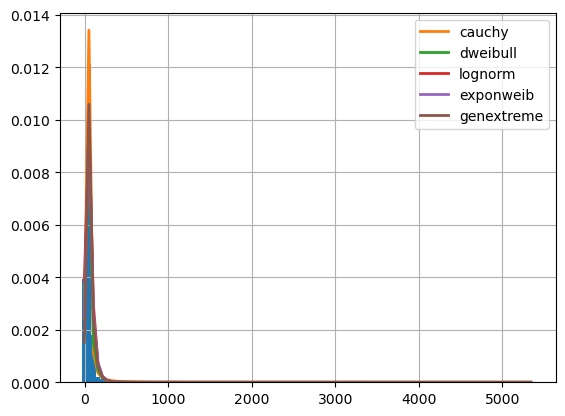

In [159]:
f = Fitter(hbnorth_rtlmp, distributions = distributions_set)
f.fit()
f.summary()


Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.10it/s]


sumsquare_error          aic            bic  kl_div  ks_statistic  \
cauchy          0.000004  2693.677994 -110258.846871     inf      0.109433   
lognorm         0.000007  6332.225972 -107484.655424     inf      0.100807   
expon           0.000077  6614.853938  -95190.897439     inf      0.302555   
gamma           0.000078  5056.976282  -95105.046151     inf      0.282008   
chi2            0.000079  6774.605134  -95022.975049     inf      0.322308   

            ks_pvalue  
cauchy   1.714325e-55  
lognorm  3.886906e-47  
expon    0.000000e+00  
gamma    0.000000e+00  
chi2     0.000000e+00

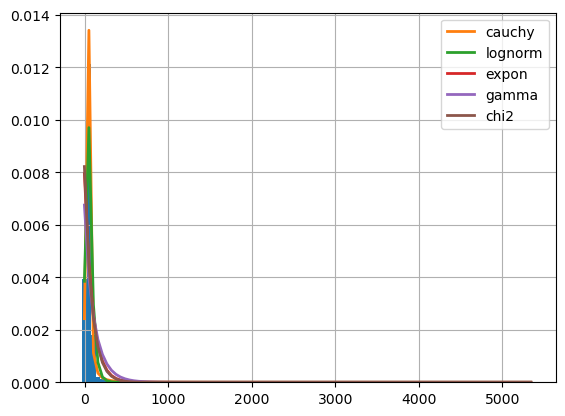

In [120]:
f = Fitter(hbnorth_rtlmp, distributions = get_common_distributions())
f.fit()
f.summary()


In [121]:
f.get_best(method = 'sumsquare_error')

{'cauchy': {'loc': 40.04465793272017, 'scale': 15.822716606756842}}

In [122]:
f.fitted_param["cauchy"]

(40.04465793272017, 15.822716606756842)

Try on log version of data

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 11.19it/s]


sumsquare_error          aic           bic  kl_div  ks_statistic  \
lognorm          0.930701  3484.734909 -45583.027012     inf      0.090040   
gamma            0.948072  2945.957062 -45485.443297     inf      0.090714   
norm             1.107919  2549.112341 -44671.816454     inf      0.100850   
cauchy           1.146046   748.325285 -44493.270170     inf      0.072811   
exponpow         5.216382  1342.971877 -36487.479741     inf      0.308277   

             ks_pvalue  
lognorm   1.119730e-37  
gamma     3.085048e-38  
norm      3.542859e-47  
cauchy    8.964159e-25  
exponpow  0.000000e+00

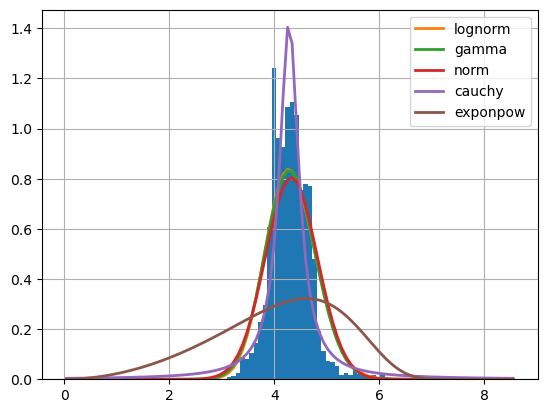

In [136]:
f = Fitter(np.log(hbnorth_rtlmp-min(hbnorth_rtlmp)+1), distributions = get_common_distributions())
f.fit()
f.summary()


In [137]:
f.get_best(method = 'sumsquare_error')

{'lognorm': {'s': 0.06834981822026964,
  'loc': -2.6716818873746337,
  'scale': 6.981487350203025}}

In [138]:
f.fitted_param["lognorm"]

(0.06834981822026964, -2.6716818873746337, 6.981487350203025)

Positive skew, long right tail. High kurtosis, heavy-tailed

Conclusion: be careful, LMPs may be described by the Cauchy distribution, which has heavy tails, many large outliers. Risky because the mean and var are undefined/infinite.

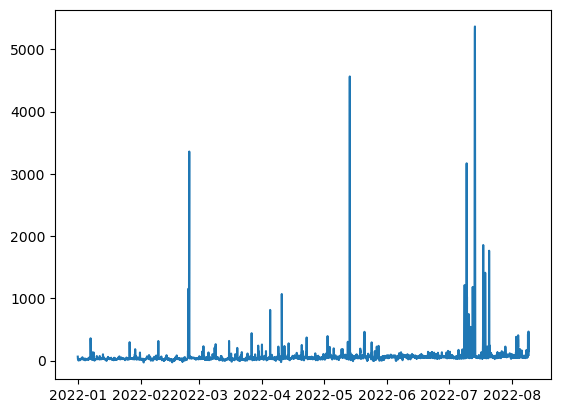

In [256]:
plt.plot(data_nonull["DATETIME"],data_nonull["HB_NORTH (RTLMP)"])

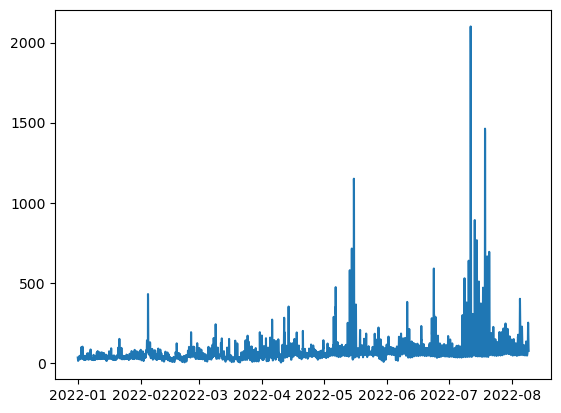

In [217]:
plt.plot(data_nonull["DATETIME"],data_nonull["HB_NORTH (DALMP)"])

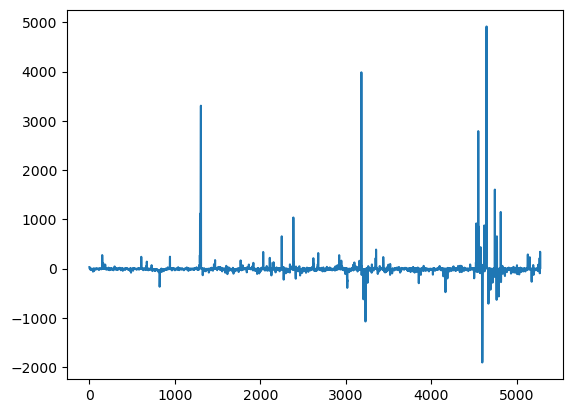

In [216]:
plt.plot(data_nonull["HB_NORTH (RTLMP)"]-data_nonull["HB_NORTH (DALMP)"])

In [41]:
data_nonull.describe().loc["mean",:].sort_values()

Katy (GASPRICE)                                 5.981451
Henry (GASPRICE)                                6.245709
HOURENDING                                     12.497442
HB_NORTH (RTLMP)                               64.949900
HB_NORTH (DALMP)                               65.103764
GR_NORTH (WINDDATA)                          1030.800457
GR_NORTH (WIND_STWPF_BIDCLOSE)               1037.550313
NORTH (ERCOT) (WIND_STWPF_BIDCLOSE)          1092.797480
WZ_North (BIDCLOSE_LOAD_FORECAST)            1296.656975
WZ_North (RTLOAD)                            1302.503940
WZ_West (BIDCLOSE_LOAD_FORECAST)             1515.472341
WZ_West (RTLOAD)                             1531.275477
GR_SOUTH (WINDDATA)                          1680.619403
GR_SOUTH (WIND_STWPF_BIDCLOSE)               1789.140515
GR_COASTAL (WINDDATA)                        1827.960461
WZ_East (RTLOAD)                             1862.905981
WZ_East (BIDCLOSE_LOAD_FORECAST)             1896.702856
GR_COASTAL (WIND_STWPF_BIDCLOSE

## Correlation Analysis and/or Principle Component Analysis (PCA), <a class="anchor" id="bullet3"></a>

### Correlation analysis:

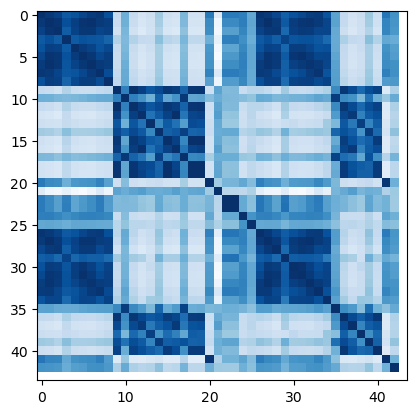

In [225]:
plt.imshow(data_nonull.corr(),cmap="Blues")

In [218]:
# https://towardsdatascience.com/the-fastest-way-to-visualize-correlation-in-python-ce10ed533346
data_nonull.corr().style.background_gradient(cmap="Blues")


In [229]:
data_nonull.columns[:27]

Index(['DATETIME', 'WZ_Coast (BIDCLOSE_LOAD_FORECAST)',
       'WZ_ERCOT (BIDCLOSE_LOAD_FORECAST)', 'WZ_East (BIDCLOSE_LOAD_FORECAST)',
       'WZ_FarWest (BIDCLOSE_LOAD_FORECAST)',
       'WZ_North (BIDCLOSE_LOAD_FORECAST)',
       'WZ_NorthCentral (BIDCLOSE_LOAD_FORECAST)',
       'WZ_SouthCentral (BIDCLOSE_LOAD_FORECAST)',
       'WZ_Southern (BIDCLOSE_LOAD_FORECAST)',
       'WZ_West (BIDCLOSE_LOAD_FORECAST)', 'ERCOT (WIND_STWPF_BIDCLOSE)',
       'GR_COASTAL (WIND_STWPF_BIDCLOSE)', 'GR_ERCOT (WIND_STWPF_BIDCLOSE)',
       'GR_NORTH (WIND_STWPF_BIDCLOSE)', 'GR_PANHANDLE (WIND_STWPF_BIDCLOSE)',
       'GR_SOUTH (WIND_STWPF_BIDCLOSE)', 'GR_WEST (WIND_STWPF_BIDCLOSE)',
       'NORTH (ERCOT) (WIND_STWPF_BIDCLOSE)',
       'SOUTH_HOUSTON (WIND_STWPF_BIDCLOSE)',
       'WEST (ERCOT) (WIND_STWPF_BIDCLOSE)',
       'WEST_NORTH (WIND_STWPF_BIDCLOSE)', 'ERCOT (SOLAR_STPPF_BIDCLOSE)',
       'ERCOT (TOTAL_RESOURCE_CAP_OUT)', 'Katy (GASPRICE)', 'Henry (GASPRICE)',
       'HB_NORTH (DALMP)', 'H

In [ ]:
#sns.pairplot(data_nonull) # too long

Plotted a sample of 1000 points and half the columns.

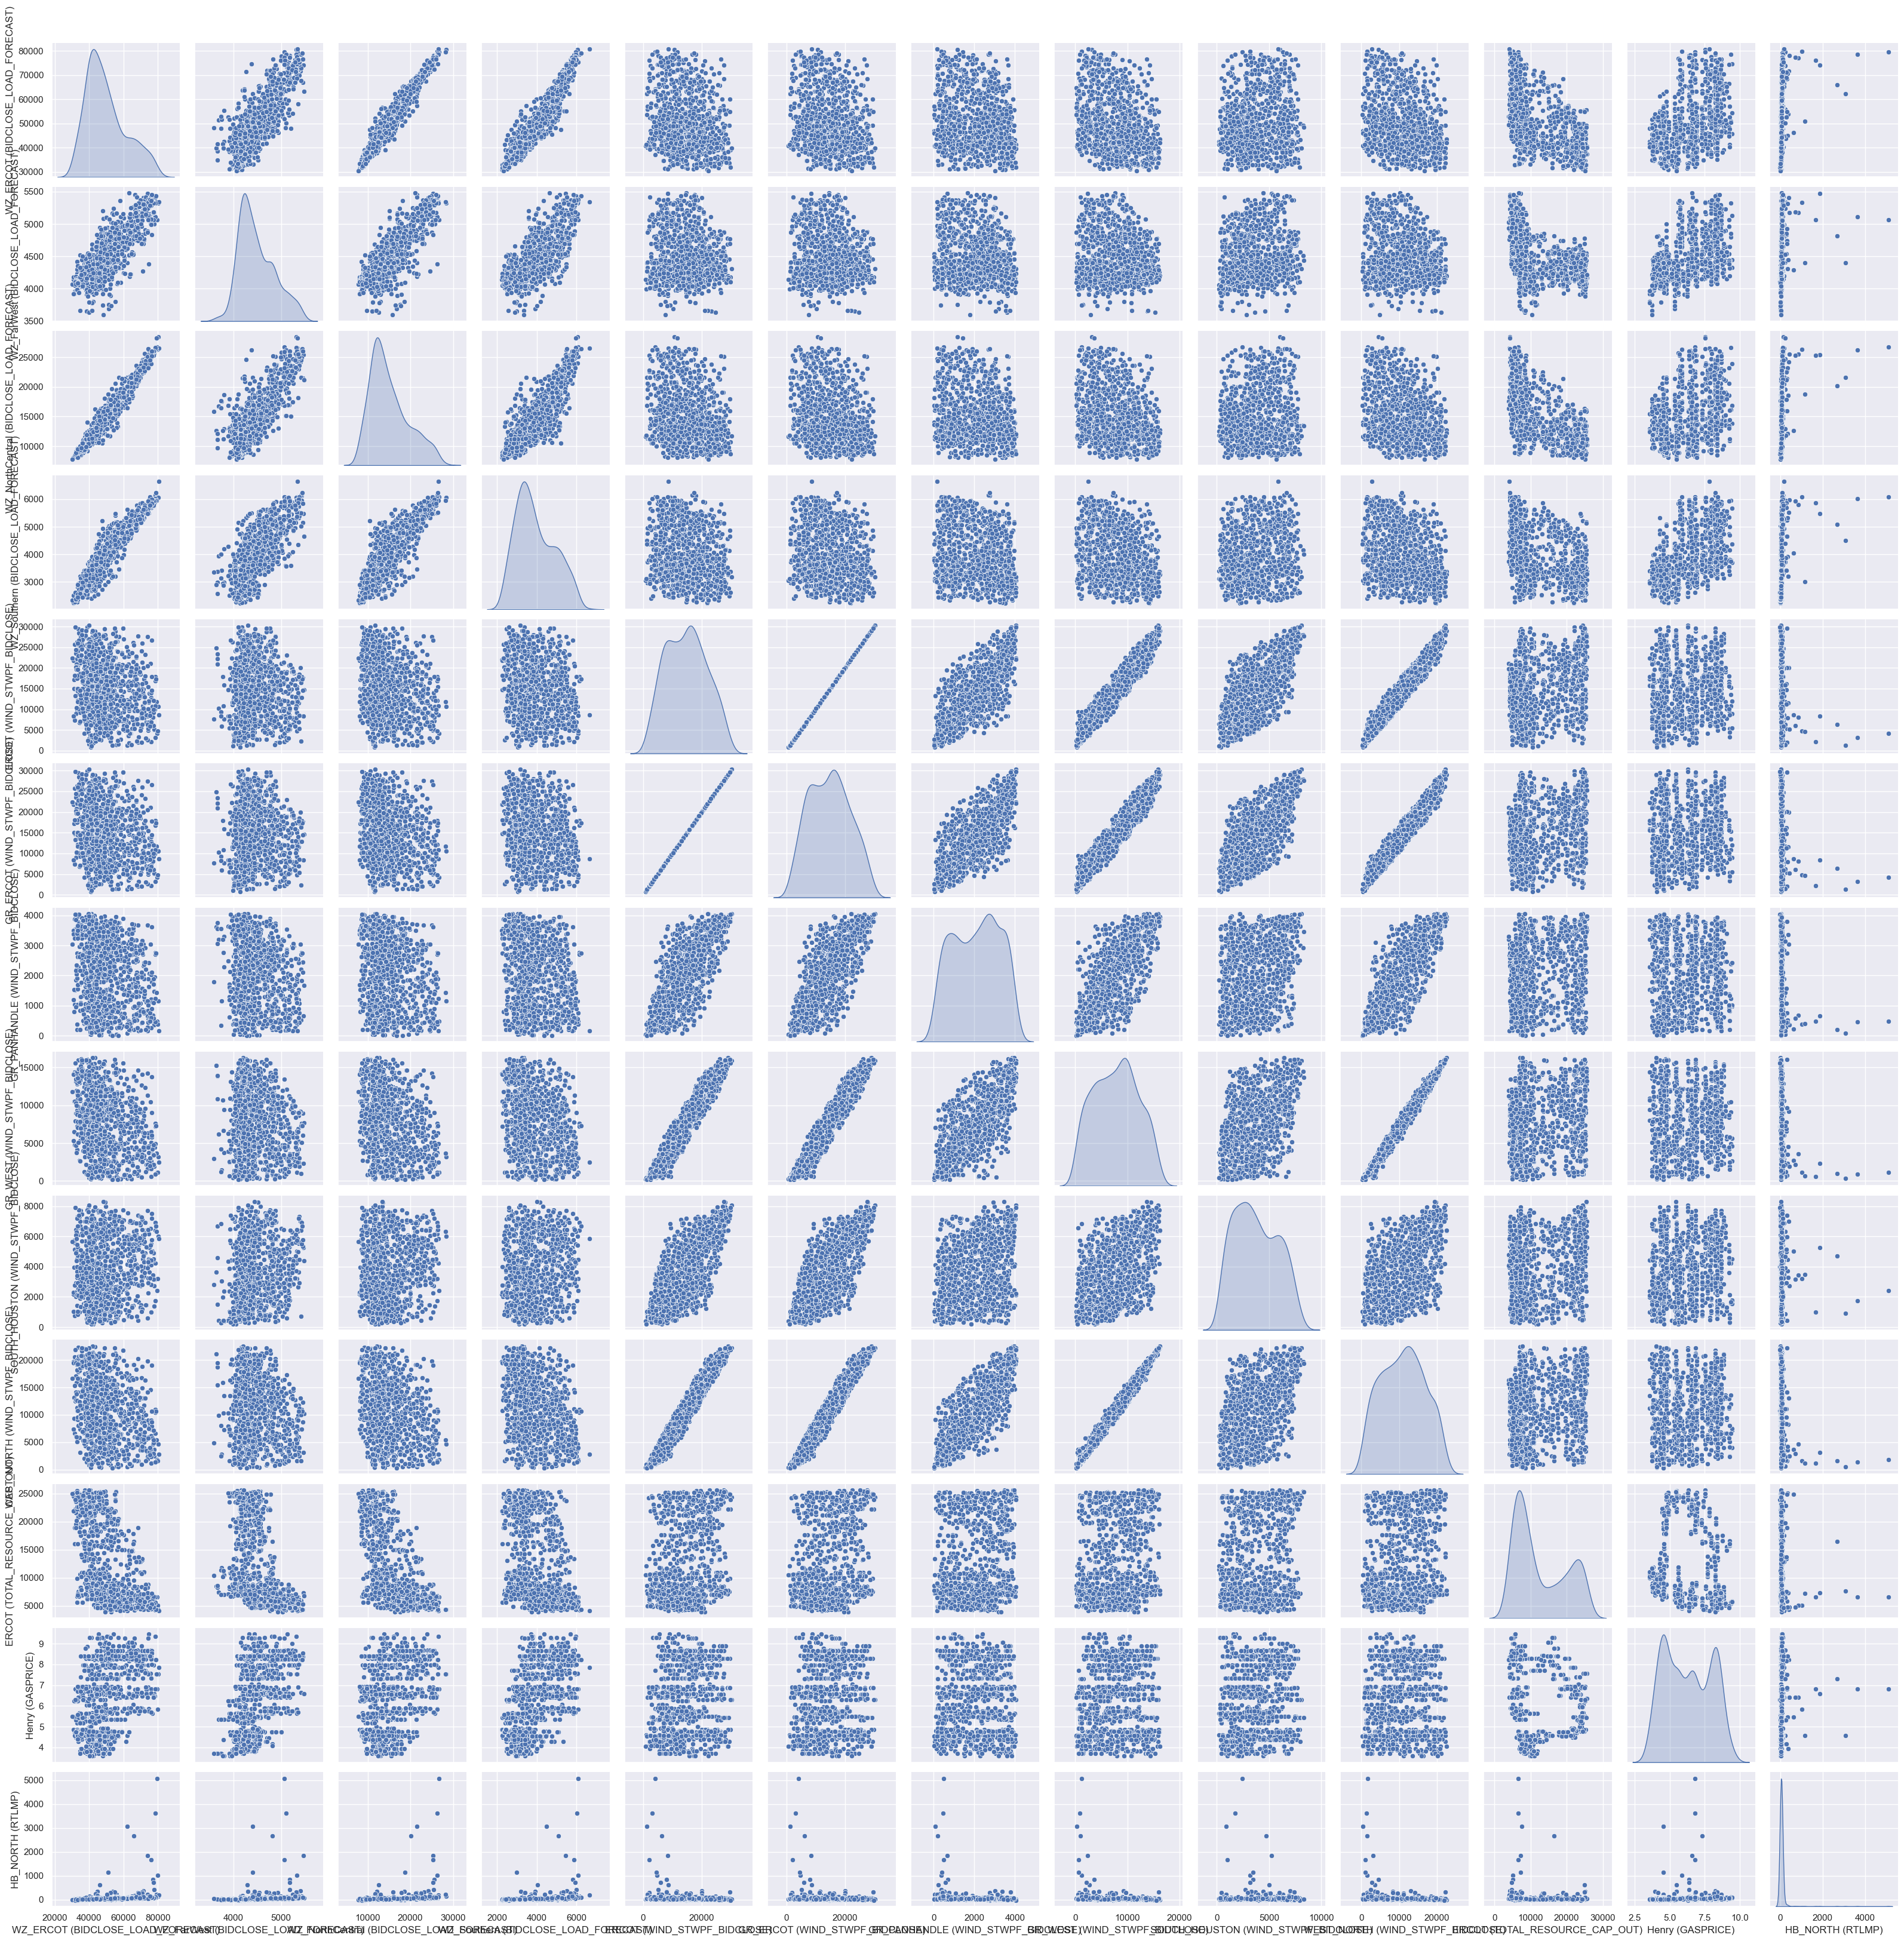

In [255]:
# https://stackoverflow.com/questions/37612434/what-are-ways-to-speed-up-seaborns-pairplot
# sns_plot = sns.pairplot(data_nonull[data_nonull.columns[:27:2]].sample(1000),diag_kind='kde')
# sns_plot.savefig("pairplot.png")

# plt.clf() # Clean parirplot figure from sns 
Image(filename='pairplot.png') # Show pairplot as image


The wind variables are overly collinear/some are almost identical. Not sure what GR_ is for/indicating.

### PCA

In [12]:
x_cols = features[features["Known Y/N"]=="Y"]["Unnamed: 0"].values

In [13]:
x_train, x_test, da_train, da_test, rt_train, rt_test = train_test_split(data_nonull[x_cols],hbnorth_dalmp,hbnorth_rtlmp,train_size = .8, shuffle = False)

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [237]:
pca = PCA()
pca.fit(x_train_scaled)
x_pca = pca.transform(x_train_scaled)


In [238]:
print(x_pca.shape)

print(x_train_scaled.shape)


(4221, 24)
(4221, 24)


In [239]:
exp_var_pca = pca.explained_variance_ratio_


<BarContainer object of 24 artists>

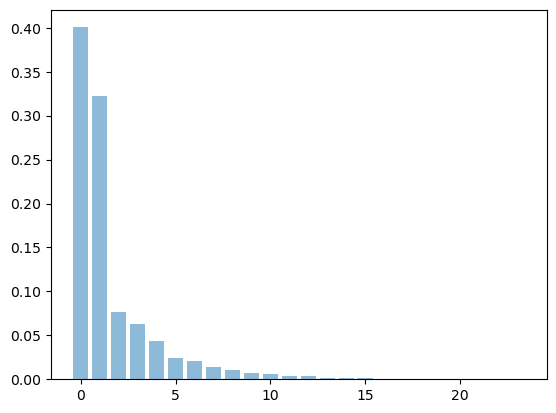

In [240]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')


Text(0, 0.5, 'Second Principal Component')

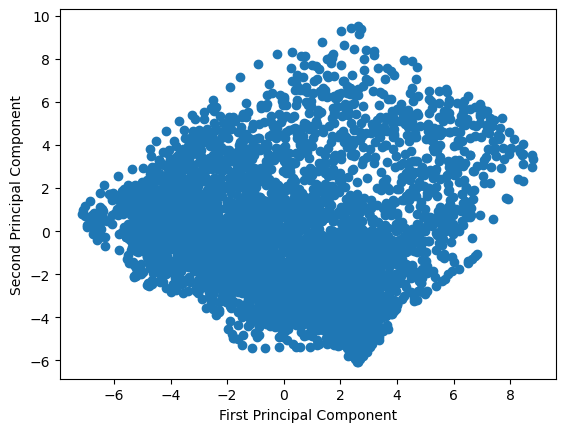

In [241]:
plt.scatter(x_pca[:,0],x_pca[:,1])

plt.xlabel('First Principal Component')

plt.ylabel('Second Principal Component')


In [252]:
for i in range(5):
    print(i)
    pca_df = pd.DataFrame(data={'variable': x_cols[np.argsort(pca.components_[i])], 'coefficient': np.sort(pca.components_[i])})
    display(pca_df)



0


variable  coefficient
0           WEST_NORTH (WIND_STWPF_BIDCLOSE)    -0.259735
1         WEST (ERCOT) (WIND_STWPF_BIDCLOSE)    -0.256384
2              GR_WEST (WIND_STWPF_BIDCLOSE)    -0.256128
3        NORTH (ERCOT) (WIND_STWPF_BIDCLOSE)    -0.254850
4             GR_NORTH (WIND_STWPF_BIDCLOSE)    -0.253549
5             GR_ERCOT (WIND_STWPF_BIDCLOSE)    -0.251641
6                ERCOT (WIND_STWPF_BIDCLOSE)    -0.251641
7         GR_PANHANDLE (WIND_STWPF_BIDCLOSE)    -0.199470
8             GR_SOUTH (WIND_STWPF_BIDCLOSE)    -0.188193
9             ERCOT (TOTAL_RESOURCE_CAP_OUT)    -0.146766
10       SOUTH_HOUSTON (WIND_STWPF_BIDCLOSE)    -0.131229
11          GR_COASTAL (WIND_STWPF_BIDCLOSE)    -0.078275
12                          Henry (GASPRICE)     0.043677
13                           Katy (GASPRICE)     0.047530
14              ERCOT (SOLAR_STPPF_BIDCLOSE)     0.124957
15       WZ_FarWest (BIDCLOSE_LOAD_FORECAST)     0.133345
16      WZ_Southern (BIDCLOSE_LOAD_FORECAST)     0.202459
17          WZ_West (BIDCLOSE_LOAD_FORECAST)     0.204565
18         WZ_North (BIDCLOSE_LOAD_FORECAST)     0.205346
19         WZ_Coast (BIDCLOSE_LOAD_FORECAST)     0.207459
20  WZ_NorthCentral (BIDCLOSE_LOAD_FORECAST)     0.229181
21         WZ_ERCOT (BIDCLOSE_LOAD_FORECAST)     0.232514
22  WZ_SouthCentral (BIDCLOSE_LOAD_FORECAST)     0.233766
23          WZ_East (BIDCLOSE_LOAD_FORECAST)     0.241640

1


variable  coefficient
0             ERCOT (TOTAL_RESOURCE_CAP_OUT)    -0.042424
1               ERCOT (SOLAR_STPPF_BIDCLOSE)     0.065654
2         GR_PANHANDLE (WIND_STWPF_BIDCLOSE)     0.138582
3             GR_NORTH (WIND_STWPF_BIDCLOSE)     0.177839
4        NORTH (ERCOT) (WIND_STWPF_BIDCLOSE)     0.179685
5              GR_WEST (WIND_STWPF_BIDCLOSE)     0.181037
6         WEST (ERCOT) (WIND_STWPF_BIDCLOSE)     0.181042
7           WEST_NORTH (WIND_STWPF_BIDCLOSE)     0.183377
8                            Katy (GASPRICE)     0.201519
9          WZ_North (BIDCLOSE_LOAD_FORECAST)     0.202701
10                          Henry (GASPRICE)     0.203542
11          WZ_East (BIDCLOSE_LOAD_FORECAST)     0.205097
12          GR_COASTAL (WIND_STWPF_BIDCLOSE)     0.211713
13            GR_ERCOT (WIND_STWPF_BIDCLOSE)     0.220678
14               ERCOT (WIND_STWPF_BIDCLOSE)     0.220679
15  WZ_NorthCentral (BIDCLOSE_LOAD_FORECAST)     0.221545
16          WZ_West (BIDCLOSE_LOAD_FORECAST)     0.225799
17  WZ_SouthCentral (BIDCLOSE_LOAD_FORECAST)     0.234043
18       WZ_FarWest (BIDCLOSE_LOAD_FORECAST)     0.236130
19       SOUTH_HOUSTON (WIND_STWPF_BIDCLOSE)     0.240432
20            GR_SOUTH (WIND_STWPF_BIDCLOSE)     0.241378
21      WZ_Southern (BIDCLOSE_LOAD_FORECAST)     0.241531
22         WZ_Coast (BIDCLOSE_LOAD_FORECAST)     0.243685
23         WZ_ERCOT (BIDCLOSE_LOAD_FORECAST)     0.244519

2


variable  coefficient
0                            Katy (GASPRICE)    -0.521809
1                           Henry (GASPRICE)    -0.519797
2             ERCOT (TOTAL_RESOURCE_CAP_OUT)    -0.369599
3               ERCOT (SOLAR_STPPF_BIDCLOSE)    -0.170108
4          WZ_Coast (BIDCLOSE_LOAD_FORECAST)    -0.126617
5       WZ_Southern (BIDCLOSE_LOAD_FORECAST)    -0.126540
6           GR_COASTAL (WIND_STWPF_BIDCLOSE)    -0.074349
7        SOUTH_HOUSTON (WIND_STWPF_BIDCLOSE)    -0.069599
8        WZ_FarWest (BIDCLOSE_LOAD_FORECAST)    -0.059959
9             GR_SOUTH (WIND_STWPF_BIDCLOSE)    -0.045400
10       NORTH (ERCOT) (WIND_STWPF_BIDCLOSE)     0.046202
11            GR_NORTH (WIND_STWPF_BIDCLOSE)     0.050232
12         WZ_ERCOT (BIDCLOSE_LOAD_FORECAST)     0.062192
13               ERCOT (WIND_STWPF_BIDCLOSE)     0.062782
14            GR_ERCOT (WIND_STWPF_BIDCLOSE)     0.062784
15  WZ_SouthCentral (BIDCLOSE_LOAD_FORECAST)     0.065254
16             GR_WEST (WIND_STWPF_BIDCLOSE)     0.092566
17          WEST_NORTH (WIND_STWPF_BIDCLOSE)     0.101051
18        WEST (ERCOT) (WIND_STWPF_BIDCLOSE)     0.106495
19        GR_PANHANDLE (WIND_STWPF_BIDCLOSE)     0.134875
20          WZ_East (BIDCLOSE_LOAD_FORECAST)     0.183854
21  WZ_NorthCentral (BIDCLOSE_LOAD_FORECAST)     0.194551
22          WZ_West (BIDCLOSE_LOAD_FORECAST)     0.197102
23         WZ_North (BIDCLOSE_LOAD_FORECAST)     0.253838

3


variable  coefficient
0         GR_PANHANDLE (WIND_STWPF_BIDCLOSE)    -0.266012
1                           Henry (GASPRICE)    -0.250842
2                            Katy (GASPRICE)    -0.242564
3         WEST (ERCOT) (WIND_STWPF_BIDCLOSE)    -0.218757
4           WEST_NORTH (WIND_STWPF_BIDCLOSE)    -0.196559
5              GR_WEST (WIND_STWPF_BIDCLOSE)    -0.196063
6        WZ_FarWest (BIDCLOSE_LOAD_FORECAST)    -0.062974
7          WZ_Coast (BIDCLOSE_LOAD_FORECAST)    -0.061917
8       WZ_Southern (BIDCLOSE_LOAD_FORECAST)    -0.029293
9             GR_ERCOT (WIND_STWPF_BIDCLOSE)    -0.023551
10               ERCOT (WIND_STWPF_BIDCLOSE)    -0.023551
11         WZ_ERCOT (BIDCLOSE_LOAD_FORECAST)    -0.018299
12  WZ_SouthCentral (BIDCLOSE_LOAD_FORECAST)    -0.007253
13          WZ_East (BIDCLOSE_LOAD_FORECAST)    -0.000618
14       NORTH (ERCOT) (WIND_STWPF_BIDCLOSE)     0.001227
15  WZ_NorthCentral (BIDCLOSE_LOAD_FORECAST)     0.006851
16            GR_NORTH (WIND_STWPF_BIDCLOSE)     0.009279
17          WZ_West (BIDCLOSE_LOAD_FORECAST)     0.018280
18         WZ_North (BIDCLOSE_LOAD_FORECAST)     0.022091
19              ERCOT (SOLAR_STPPF_BIDCLOSE)     0.081743
20            ERCOT (TOTAL_RESOURCE_CAP_OUT)     0.218479
21            GR_SOUTH (WIND_STWPF_BIDCLOSE)     0.234783
22       SOUTH_HOUSTON (WIND_STWPF_BIDCLOSE)     0.474016
23          GR_COASTAL (WIND_STWPF_BIDCLOSE)     0.580696

4


variable  coefficient
0             GR_SOUTH (WIND_STWPF_BIDCLOSE)    -0.200824
1                            Katy (GASPRICE)    -0.197103
2        WZ_FarWest (BIDCLOSE_LOAD_FORECAST)    -0.194940
3                           Henry (GASPRICE)    -0.192058
4        SOUTH_HOUSTON (WIND_STWPF_BIDCLOSE)    -0.126450
5           WZ_West (BIDCLOSE_LOAD_FORECAST)    -0.093398
6           GR_COASTAL (WIND_STWPF_BIDCLOSE)    -0.046629
7   WZ_NorthCentral (BIDCLOSE_LOAD_FORECAST)    -0.009125
8   WZ_SouthCentral (BIDCLOSE_LOAD_FORECAST)     0.007205
9             GR_NORTH (WIND_STWPF_BIDCLOSE)     0.022833
10       NORTH (ERCOT) (WIND_STWPF_BIDCLOSE)     0.031404
11               ERCOT (WIND_STWPF_BIDCLOSE)     0.038720
12            GR_ERCOT (WIND_STWPF_BIDCLOSE)     0.038722
13         WZ_ERCOT (BIDCLOSE_LOAD_FORECAST)     0.045981
14          WZ_East (BIDCLOSE_LOAD_FORECAST)     0.046289
15         WZ_North (BIDCLOSE_LOAD_FORECAST)     0.051362
16             GR_WEST (WIND_STWPF_BIDCLOSE)     0.079795
17          WEST_NORTH (WIND_STWPF_BIDCLOSE)     0.091908
18        WEST (ERCOT) (WIND_STWPF_BIDCLOSE)     0.098212
19      WZ_Southern (BIDCLOSE_LOAD_FORECAST)     0.134917
20        GR_PANHANDLE (WIND_STWPF_BIDCLOSE)     0.152377
21         WZ_Coast (BIDCLOSE_LOAD_FORECAST)     0.156212
22            ERCOT (TOTAL_RESOURCE_CAP_OUT)     0.343850
23              ERCOT (SOLAR_STPPF_BIDCLOSE)     0.773946

First component is difference of load and wind, second component is addition. Third has gas.

Not very interpretable, may be better to do feature selection on the original features

## Feature selection <a class="anchor" id="bullet4"></a>

Feature selection is part of Lasso regularization in LassoCV.

## Time series/cross sectional modeling (Regressions/Classifications) <a class="anchor" id="bullet5"></a>

Train/test split: chronological

In [12]:
x_cols = features[features["Known Y/N"]=="Y"]["Unnamed: 0"].values

In [13]:
x_train, x_test, da_train, da_test, rt_train, rt_test = train_test_split(data_nonull[x_cols],hbnorth_dalmp,hbnorth_rtlmp,train_size = .8, shuffle = False)

Try multiple linear regression first

### Regularized linear regression

LassoCV is regularized multiple linear regression, using Lasso (L1) regularization, which adds a penalty to the sum of the absolute value of regression coefficients. It can perform feature selection by setting coefficients to 0. 
5-fold cross validation is used to select the regularization penalty. The final model is selected based on minimizing sum of squared errors plus the penalty.

In [16]:
# scale/standardize
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [18]:
reg = LassoCV(max_iter=10000)
reg.fit(x_train_scaled,rt_train)

LassoCV(max_iter=10000)

In [257]:
# save trained model as "pickle" file
with open("LassoCVmodel.pkl", "wb") as file: pickle.dump(reg, file)
#with open("LassoCVmodel.pkl", "rb") as file: reg = pickle.load(file)


In [258]:
reg.alpha_

1.1962272523327009

In [20]:
reg.coef_

array([12.43108168,  0.        ,  0.        ,  0.        ,  1.14554913,
       18.53814905,  0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        , -7.49354323, -0.        ,
       -0.        , -0.        ,  0.        , -7.77841941, -0.        ,
       -9.24083372, 13.82298737,  2.87727075,  0.        ])

In [22]:
# R2/COD train
reg.score(x_train_scaled,rt_train)


0.06403631100226914

In [79]:
#  RMSE_train
mean_squared_error(rt_train,reg.predict(x_train_scaled),squared = False)

125.75639145058607

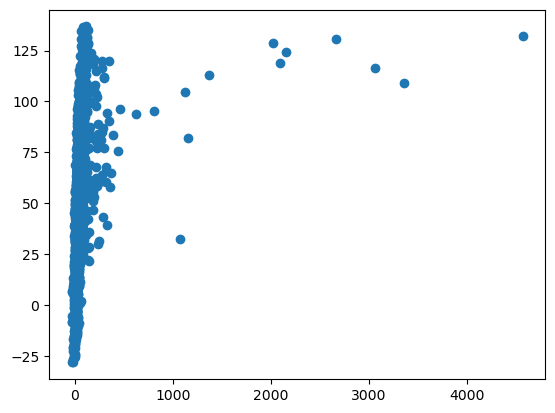

In [85]:
fig, ax = plt.subplots()

ax.scatter(rt_train,reg.predict(x_train_scaled))


(-48.19305390316814, 186.81445066661635)

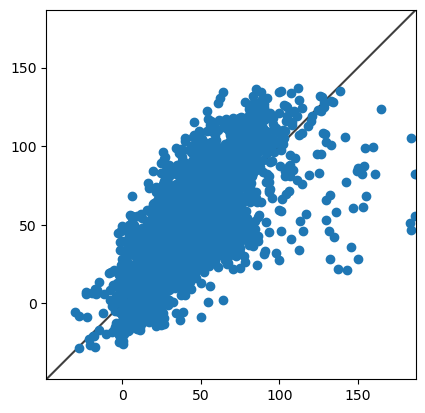

In [61]:
fig, ax = plt.subplots()

ax.scatter(rt_train,reg.predict(x_train_scaled))

# https://stackoverflow.com/questions/25497402/adding-y-x-to-a-matplotlib-scatter-plot-if-i-havent-kept-track-of-all-the-data

lims = [
    np.min(reg.predict(x_train_scaled))-20,  # 
    np.max(reg.predict(x_train_scaled))+50,  # 
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)


Text(0, 0.5, 'predicted')

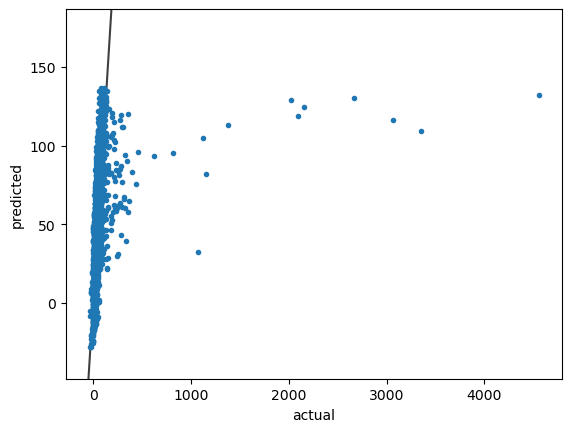

In [265]:
fig, ax = plt.subplots()

ax.scatter(rt_train,reg.predict(x_train_scaled), marker = ".")

# https://stackoverflow.com/questions/25497402/adding-y-x-to-a-matplotlib-scatter-plot-if-i-havent-kept-track-of-all-the-data

lims = [
    np.min(reg.predict(x_train_scaled))-20,  # min of both axes
    np.max(reg.predict(x_train_scaled))+50,  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_ylim(lims)
ax.set_xlabel("actual")
ax.set_ylabel("predicted")


Many outliers at high RT LMPs

In [28]:
coefficients

array([49.70704869, 12.43108168,  0.        ,  0.        ,  0.        ,
        1.14554913, 18.53814905,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -7.49354323,
       -0.        , -0.        , -0.        ,  0.        , -7.77841941,
       -0.        , -9.24083372, 13.82298737,  2.87727075,  0.        ])

In [260]:
coefficients = np.hstack((reg.intercept_, reg.coef_))
coef_df = pd.DataFrame(data={'variable':  ['intercept'] + x_cols.tolist(), 'coefficient': coefficients})
display(coef_df[coef_df['coefficient']!=0].sort_values("coefficient"))


variable  coefficient
21              ERCOT (SOLAR_STPPF_BIDCLOSE)    -9.240834
19        WEST (ERCOT) (WIND_STWPF_BIDCLOSE)    -7.778419
14        GR_PANHANDLE (WIND_STWPF_BIDCLOSE)    -7.493543
5          WZ_North (BIDCLOSE_LOAD_FORECAST)     1.145549
23                           Katy (GASPRICE)     2.877271
1          WZ_Coast (BIDCLOSE_LOAD_FORECAST)    12.431082
22            ERCOT (TOTAL_RESOURCE_CAP_OUT)    13.822987
6   WZ_NorthCentral (BIDCLOSE_LOAD_FORECAST)    18.538149
0                                  intercept    49.707049

In [37]:
coefficients = np.hstack((reg.intercept_, reg.coef_))
coef_df = pd.DataFrame(data={'variable':  ['intercept'] + x_cols.tolist(), 'coefficient': coefficients})
display(coef_df.sort_values("coefficient"))


variable  coefficient
21              ERCOT (SOLAR_STPPF_BIDCLOSE)    -9.240834
19        WEST (ERCOT) (WIND_STWPF_BIDCLOSE)    -7.778419
14        GR_PANHANDLE (WIND_STWPF_BIDCLOSE)    -7.493543
12            GR_ERCOT (WIND_STWPF_BIDCLOSE)    -0.000000
20          WEST_NORTH (WIND_STWPF_BIDCLOSE)    -0.000000
18       SOUTH_HOUSTON (WIND_STWPF_BIDCLOSE)     0.000000
17       NORTH (ERCOT) (WIND_STWPF_BIDCLOSE)    -0.000000
16             GR_WEST (WIND_STWPF_BIDCLOSE)    -0.000000
15            GR_SOUTH (WIND_STWPF_BIDCLOSE)    -0.000000
13            GR_NORTH (WIND_STWPF_BIDCLOSE)    -0.000000
11          GR_COASTAL (WIND_STWPF_BIDCLOSE)     0.000000
24                          Henry (GASPRICE)     0.000000
9           WZ_West (BIDCLOSE_LOAD_FORECAST)     0.000000
8       WZ_Southern (BIDCLOSE_LOAD_FORECAST)     0.000000
7   WZ_SouthCentral (BIDCLOSE_LOAD_FORECAST)     0.000000
4        WZ_FarWest (BIDCLOSE_LOAD_FORECAST)     0.000000
3           WZ_East (BIDCLOSE_LOAD_FORECAST)     0.000000
2          WZ_ERCOT (BIDCLOSE_LOAD_FORECAST)     0.000000
10               ERCOT (WIND_STWPF_BIDCLOSE)    -0.000000
5          WZ_North (BIDCLOSE_LOAD_FORECAST)     1.145549
23                           Katy (GASPRICE)     2.877271
1          WZ_Coast (BIDCLOSE_LOAD_FORECAST)    12.431082
22            ERCOT (TOTAL_RESOURCE_CAP_OUT)    13.822987
6   WZ_NorthCentral (BIDCLOSE_LOAD_FORECAST)    18.538149
0                                  intercept    49.707049

https://www.ercot.com/news/mediakit/maps

Selection:

North Hub is average of prices in North load zone.

In terms of weather zones, matches NorthCentral, with highest coefficient. Coast has a lot of load in general

Katy gas hub in Texas, Henry in Louisiana, makes sense. Higher gas price higher power price.

Subtract off renewables:

Top wind zones included.

Large solar coefficient?



Conclusion: not a good model, because RT LMPs have many nonlinear effects, and large outliers.

### Use log transform of dependent variable (rt lmp)

In [171]:
log_rtlmp
log_rtlmp_train, log_rtlmp_test = train_test_split(log_rtlmp,train_size = .8, shuffle = False)

In [172]:
log_rtlmp_train

0       4.554456
1       4.145394
2       4.029539
3       3.972412
4       3.842512
          ...   
4217    4.789552
4218    4.843183
4219    4.810007
4220    4.508604
4221    4.420376
Name: HB_NORTH (RTLMP), Length: 4221, dtype: float64

In [173]:
reg = LassoCV(max_iter=10000)
reg.fit(x_train_scaled,log_rtlmp_train)

LassoCV(max_iter=10000)

In [174]:
# save trained model as "pickle" file
with open("LogTransformLassoCVmodel.pkl", "wb") as file: pickle.dump(reg, file)
# with open("LogTransformLassoCVmodel.pkl", "rb") as file: reg = pickle.load(file)


In [175]:
reg.alpha_

0.00439848772483064

In [176]:
reg.coef_

array([ 0.13853075,  0.01875184,  0.        ,  0.00134411,  0.01366848,
        0.11042099,  0.        ,  0.00085435,  0.        , -0.        ,
        0.00118997, -0.        , -0.        , -0.02321478, -0.01036535,
       -0.        , -0.        ,  0.        , -0.09238531, -0.        ,
       -0.11331946,  0.12278523,  0.        ,  0.08434157])

In [209]:
coefficients = np.hstack((reg.intercept_, reg.coef_))
coef_df = pd.DataFrame(data={'variable':  ['intercept'] + x_cols.tolist(), 'coefficient': coefficients})
display(coef_df.sort_values("coefficient"))


variable  coefficient
21              ERCOT (SOLAR_STPPF_BIDCLOSE)    -0.113319
19        WEST (ERCOT) (WIND_STWPF_BIDCLOSE)    -0.092385
14        GR_PANHANDLE (WIND_STWPF_BIDCLOSE)    -0.023215
15            GR_SOUTH (WIND_STWPF_BIDCLOSE)    -0.010365
17       NORTH (ERCOT) (WIND_STWPF_BIDCLOSE)    -0.000000
16             GR_WEST (WIND_STWPF_BIDCLOSE)    -0.000000
13            GR_NORTH (WIND_STWPF_BIDCLOSE)    -0.000000
23                           Katy (GASPRICE)     0.000000
10               ERCOT (WIND_STWPF_BIDCLOSE)    -0.000000
12            GR_ERCOT (WIND_STWPF_BIDCLOSE)    -0.000000
7   WZ_SouthCentral (BIDCLOSE_LOAD_FORECAST)     0.000000
20          WEST_NORTH (WIND_STWPF_BIDCLOSE)    -0.000000
3           WZ_East (BIDCLOSE_LOAD_FORECAST)     0.000000
18       SOUTH_HOUSTON (WIND_STWPF_BIDCLOSE)     0.000000
9           WZ_West (BIDCLOSE_LOAD_FORECAST)     0.000000
8       WZ_Southern (BIDCLOSE_LOAD_FORECAST)     0.000854
11          GR_COASTAL (WIND_STWPF_BIDCLOSE)     0.001190
4        WZ_FarWest (BIDCLOSE_LOAD_FORECAST)     0.001344
5          WZ_North (BIDCLOSE_LOAD_FORECAST)     0.013668
2          WZ_ERCOT (BIDCLOSE_LOAD_FORECAST)     0.018752
24                          Henry (GASPRICE)     0.084342
6   WZ_NorthCentral (BIDCLOSE_LOAD_FORECAST)     0.110421
22            ERCOT (TOTAL_RESOURCE_CAP_OUT)     0.122785
1          WZ_Coast (BIDCLOSE_LOAD_FORECAST)     0.138531
0                                  intercept     4.239238

In [180]:
# R2/COD train
reg.score(x_train_scaled,log_rtlmp_train)


0.4691807117279466

In [181]:
#  RMSE_train
mean_squared_error(log_rtlmp_train,reg.predict(x_train_scaled),squared = False)

0.314004067456655

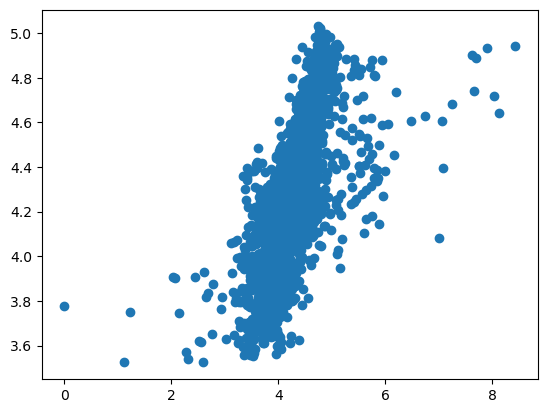

In [182]:
fig, ax = plt.subplots()

ax.scatter(log_rtlmp_train,reg.predict(x_train_scaled))


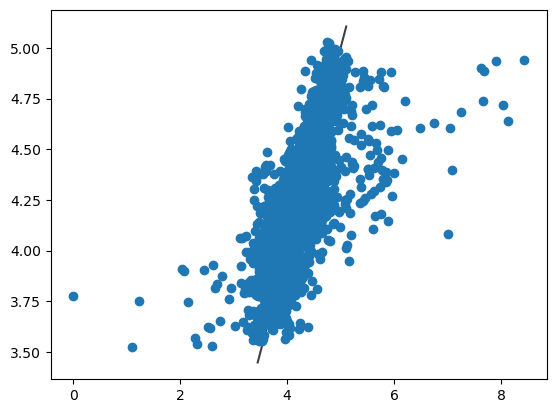

In [189]:
fig, ax = plt.subplots()

ax.scatter(log_rtlmp_train,reg.predict(x_train_scaled))

lims = [
    np.min([ ax.get_ylim()]),  # min of both axes
    np.max([ ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)


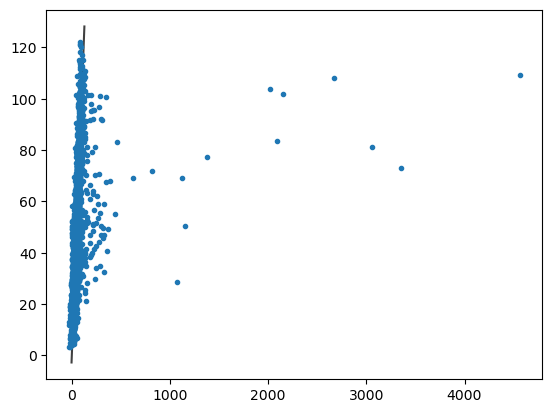

In [193]:
fig, ax = plt.subplots()

ax.scatter(rt_train,unlogtransform(reg.predict(x_train_scaled),min(hbnorth_rtlmp)),marker = '.')

lims = [
    np.min([ ax.get_ylim()]),  # min of both axes
    np.max([ ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)


In [194]:
mean_squared_error(rt_train,unlogtransform(reg.predict(x_train_scaled),min(hbnorth_rtlmp)),squared = False)

126.36880928883673

Similar performance

### Polynomial regression

reference: https://data36.com/polynomial-regression-python-scikit-learn/

### Try loess regression

### Time series? ARIMA, differencing, RNN?

Classification: Classify based on RT-DA direction, large RT, large DA?

## Cross validation <a class="anchor" id="bullet6"></a>

5-fold cross validation is used in LassoCV.

<a class="anchor" id="bullet7"></a>
## Model selection via backtesting performance in Economic terms (PnL, Max Drawdown, Expected Gain and Loss etc.) and Statistical terms (R2, MSE/MAE, Recall and Precision, confusion matrix etc.). 

Split the test set in two again as a separate validation set to do backtesting and final selection with, for 80-10-10 split.

In [62]:
x_val, x_test2, da_val, da_test2, rt_val, rt_test2 = train_test_split(x_test,da_test,rt_test,train_size = .5, shuffle = False)

Evaluate multiple linear regression with lasso penalty model: for RT LMP

In [86]:
x_val

WZ_Coast (BIDCLOSE_LOAD_FORECAST)  WZ_ERCOT (BIDCLOSE_LOAD_FORECAST)  \
4222                         14075.2002                         57511.0505   
4223                         13608.0996                         54381.8695   
4224                         12805.5000                         50806.8205   
4225                         12163.7998                         47911.3102   
4226                         11806.5000                         45981.5201   
...                                 ...                                ...   
4745                         18143.8008                         74111.4308   
4746                         17409.1992                         71972.8491   
4747                         16831.0000                         69117.5306   
4748                         16296.9004                         66915.3711   
4749                         15466.7002                         63153.6800   

      WZ_East (BIDCLOSE_LOAD_FORECAST)  WZ_FarWest (BIDCLOSE_LOAD_FORECAST)  \
4222                         2324.2600                            4816.2100   
4223                         2021.9700                            4680.5601   
4224                         1826.1899                            4607.0601   
4225                         1660.9900                            4563.2598   
4226                         1574.7600                            4554.3799   
...                                ...                                  ...   
4745                         2372.7800                            5468.4702   
4746                         2284.5801                            5468.7700   
4747                         2180.8701                            5405.3599   
4748                         2088.9500                            5489.7700   
4749                         1926.2100                            5478.1201   

      WZ_North (BIDCLOSE_LOAD_FORECAST)  \
4222                          1627.8000   
4223                          1529.7700   
4224                          1425.0400   
4225                          1343.2100   
4226                          1302.5900   
...                                 ...   
4745                          2689.7800   
4746                          2677.1101   
4747                          2579.7800   
4748                          2477.5300   
4749                          2301.9700   

      WZ_NorthCentral (BIDCLOSE_LOAD_FORECAST)  \
4222                                19146.9004   
4223                                17748.0000   
4224                                16477.5000   
4225                                15473.4004   
4226                                14759.7002   
...                                        ...   
4745                                25358.0996   
4746                                24645.6992   
4747                                23498.3008   
4748                                22626.9004   
4749                                21144.5996   

      WZ_SouthCentral (BIDCLOSE_LOAD_FORECAST)  \
4222                                 9530.2598   
4223                                 9074.4199   
4224                                 8277.7305   
4225                                 7626.4702   
4226                                 7139.6499   
...                                        ...   
4745                                12429.4004   
4746                                12079.2002   
4747                                11524.0000   
4748                                11057.4004   
4749                                10318.7002   

      WZ_Southern (BIDCLOSE_LOAD_FORECAST)  WZ_West (BIDCLOSE_LOAD_FORECAST)  \
4222                             4187.8901                         1802.5300   
4223                             4004.7300                         1714.3199   
4224                             3784.7500                         1603.0500   
4225                             3582.2000                         1497.9800   
4

In [71]:
x_val_scaled = scaler.transform(x_val)

In [72]:
#  RMSE val
mean_squared_error(rt_val,reg.predict(x_val_scaled),squared = False)

496.3365501138565

In [268]:
np.std(rt_train)

129.9871933440077

In [73]:
np.std(rt_val)

502.01012946589293

In [80]:
# MSE Val
mean_squared_error(rt_val,reg.predict(x_val_scaled),squared = True)

246349.97097892477

In [82]:
# MAE Validation set
mean_absolute_error(rt_val,reg.predict(x_val_scaled))

109.25535664588833

In [83]:
# R2/COD train
reg.score(x_train_scaled,rt_train)


0.06403631100226914

In [84]:
# R2/COD val
reg.score(x_val_scaled,rt_val)


0.022475716764246645

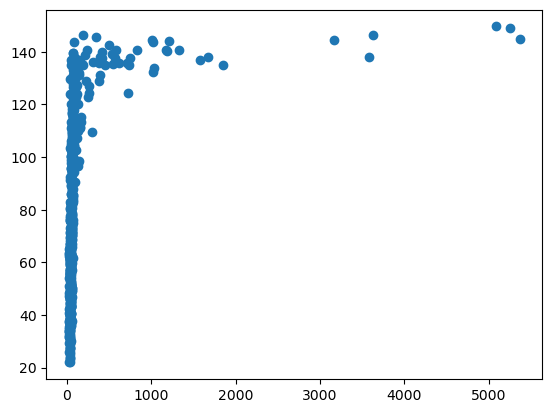

In [78]:
plt.scatter(rt_val,reg.predict(x_val_scaled))

(1.9632861177603473, 199.59159293377834)

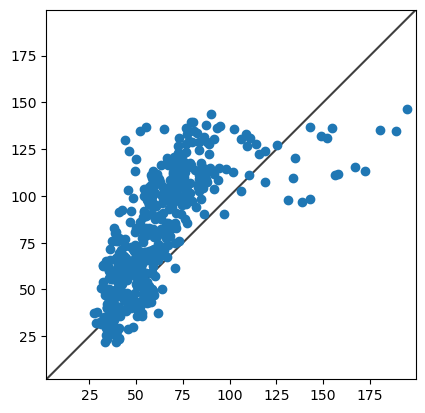

In [77]:
fig, ax = plt.subplots()

ax.scatter(rt_val,reg.predict(x_val_scaled))

# https://stackoverflow.com/questions/25497402/adding-y-x-to-a-matplotlib-scatter-plot-if-i-havent-kept-track-of-all-the-data

lims = [
    np.min(reg.predict(x_val_scaled))-20,  # 
    np.max(reg.predict(x_val_scaled))+50,  # 
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)


In [73]:
np.std(rt_val)

502.01012946589293

really bad

Economic terms:

Assume bid 1 MW at predicted price in both directions, so always clear.

In [87]:
pred = reg.predict(x_val_scaled)

In [91]:
econ_eval_df = pd.DataFrame(data = {"dalmp": da_val,"rtlmp": rt_val,"pred": pred})

In [94]:
econ_eval_df

dalmp      rtlmp        pred
4222   51.72    43.4850   65.697827
4223   44.93    39.6600   55.931795
4224   43.25    38.4025   46.155930
4225   39.26    37.9100   38.977263
4226   38.12    36.9750   33.950155
...      ...        ...         ...
4745  252.01  1856.4550  134.903561
4746  250.00   618.4800  135.561879
4747  173.50   152.2275  131.015197
4748   89.56    70.0200  119.507825
4749   63.57    59.8025  101.389178

[528 rows x 3 columns]

In [95]:
# if prediction is greater than da, cleared a bid to buy, pos exposure to rt, get rt-da
# if prediction less than da, cleared offer to sell, neg exposure to rt, get da - rt
econ_eval_df["rtexp"] = np.where(econ_eval_df["pred"] >= econ_eval_df["dalmp"],1,-1)

In [97]:
econ_eval_df["return"] = np.multiply(econ_eval_df["rtexp"],econ_eval_df["rtlmp"] - econ_eval_df["dalmp"] )

In [99]:
econ_eval_df

dalmp      rtlmp        pred  rtexp     return
4222   51.72    43.4850   65.697827      1    -8.2350
4223   44.93    39.6600   55.931795      1    -5.2700
4224   43.25    38.4025   46.155930      1    -4.8475
4225   39.26    37.9100   38.977263     -1     1.3500
4226   38.12    36.9750   33.950155     -1     1.1450
...      ...        ...         ...    ...        ...
4745  252.01  1856.4550  134.903561     -1 -1604.4450
4746  250.00   618.4800  135.561879     -1  -368.4800
4747  173.50   152.2275  131.015197     -1    21.2725
4748   89.56    70.0200  119.507825      1   -19.5400
4749   63.57    59.8025  101.389178      1    -3.7675

[528 rows x 5 columns]

In [102]:
econ_eval_df["cumreturn"] = np.cumsum(econ_eval_df["return"])

In [100]:
econ_eval_df["return"].sum()

-22048.2125

Overall PnL:
-22048.21
Loss

In [109]:
econ_eval_df["return"].mean()

-41.757978219696966

Average/expected gain/loss: -41.75

In [103]:
econ_eval_df

dalmp      rtlmp        pred  rtexp     return   cumreturn
4222   51.72    43.4850   65.697827      1    -8.2350     -8.2350
4223   44.93    39.6600   55.931795      1    -5.2700    -13.5050
4224   43.25    38.4025   46.155930      1    -4.8475    -18.3525
4225   39.26    37.9100   38.977263     -1     1.3500    -17.0025
4226   38.12    36.9750   33.950155     -1     1.1450    -15.8575
...      ...        ...         ...    ...        ...         ...
4745  252.01  1856.4550  134.903561     -1 -1604.4450 -21677.6975
4746  250.00   618.4800  135.561879     -1  -368.4800 -22046.1775
4747  173.50   152.2275  131.015197     -1    21.2725 -22024.9050
4748   89.56    70.0200  119.507825      1   -19.5400 -22044.4450
4749   63.57    59.8025  101.389178      1    -3.7675 -22048.2125

[528 rows x 6 columns]

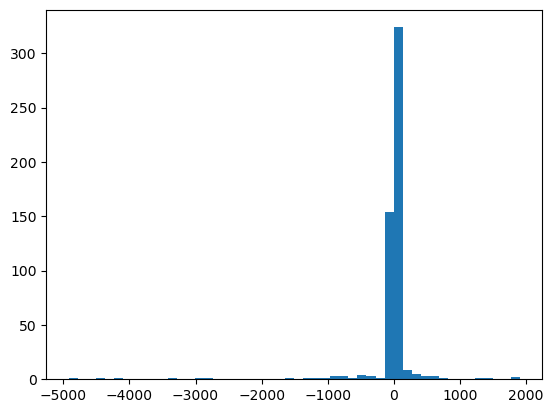

In [108]:
plt.hist(econ_eval_df["return"],bins = 50)
plt.show()

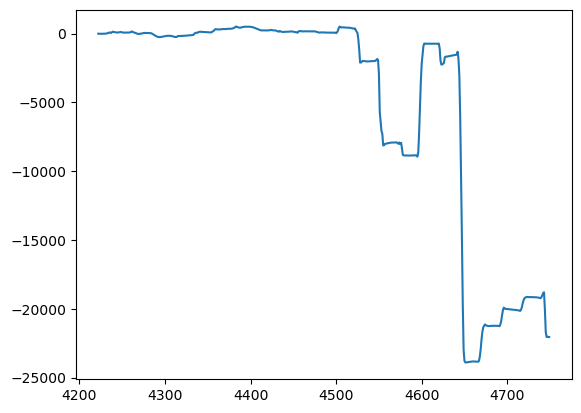

In [105]:
plt.plot(econ_eval_df["cumreturn"])

In [114]:
# calculate max drawdown with max of (cumulative max of cumulativeReturn minus current cumulativeReturn)
max_drawdown = np.max(econ_eval_df["cumreturn"].cummax()-econ_eval_df["cumreturn"])
max_drawdown

24411.037499999995

Max drawdown of 24411.03

In [116]:
np.percentile(econ_eval_df["return"],5)

-114.15187499999999

hourly 95 percentile VAR of -114.15

### Econ evaluation of log transformed dependent variable model

In [195]:
pred = unlogtransform(reg.predict(x_val_scaled),min(hbnorth_rtlmp))

In [196]:
econ_eval_df = pd.DataFrame(data = {"dalmp": da_val,"rtlmp": rt_val,"pred": pred})

In [197]:
econ_eval_df

dalmp      rtlmp        pred
4222   51.72    43.4850   48.196010
4223   44.93    39.6600   41.454369
4224   43.25    38.4025   35.578566
4225   39.26    37.9100   31.849593
4226   38.12    36.9750   29.814087
...      ...        ...         ...
4745  252.01  1856.4550  106.418878
4746  250.00   618.4800  111.146360
4747  173.50   152.2275  109.769416
4748   89.56    70.0200   97.280525
4749   63.57    59.8025   78.925441

[528 rows x 3 columns]

In [198]:
# if prediction is greater than da, cleared a bid to buy, pos exposure to rt, get rt-da
# if prediction less than da, cleared offer to sell, neg exposure to rt, get da - rt
econ_eval_df["rtexp"] = np.where(econ_eval_df["pred"] >= econ_eval_df["dalmp"],1,-1)

In [199]:
econ_eval_df["return"] = np.multiply(econ_eval_df["rtexp"],econ_eval_df["rtlmp"] - econ_eval_df["dalmp"] )

In [200]:
econ_eval_df

dalmp      rtlmp        pred  rtexp     return
4222   51.72    43.4850   48.196010     -1     8.2350
4223   44.93    39.6600   41.454369     -1     5.2700
4224   43.25    38.4025   35.578566     -1     4.8475
4225   39.26    37.9100   31.849593     -1     1.3500
4226   38.12    36.9750   29.814087     -1     1.1450
...      ...        ...         ...    ...        ...
4745  252.01  1856.4550  106.418878     -1 -1604.4450
4746  250.00   618.4800  111.146360     -1  -368.4800
4747  173.50   152.2275  109.769416     -1    21.2725
4748   89.56    70.0200   97.280525      1   -19.5400
4749   63.57    59.8025   78.925441      1    -3.7675

[528 rows x 5 columns]

In [201]:
econ_eval_df["cumreturn"] = np.cumsum(econ_eval_df["return"])

In [202]:
econ_eval_df["return"].sum()

-20948.257499999996

Overall PnL:
-20948.25 Loss

In [203]:
econ_eval_df["return"].mean()

-39.67473011363637

Average/expected gain/loss: -39.67

In [204]:
econ_eval_df

dalmp      rtlmp        pred  rtexp     return   cumreturn
4222   51.72    43.4850   48.196010     -1     8.2350      8.2350
4223   44.93    39.6600   41.454369     -1     5.2700     13.5050
4224   43.25    38.4025   35.578566     -1     4.8475     18.3525
4225   39.26    37.9100   31.849593     -1     1.3500     19.7025
4226   38.12    36.9750   29.814087     -1     1.1450     20.8475
...      ...        ...         ...    ...        ...         ...
4745  252.01  1856.4550  106.418878     -1 -1604.4450 -20577.7425
4746  250.00   618.4800  111.146360     -1  -368.4800 -20946.2225
4747  173.50   152.2275  109.769416     -1    21.2725 -20924.9500
4748   89.56    70.0200   97.280525      1   -19.5400 -20944.4900
4749   63.57    59.8025   78.925441      1    -3.7675 -20948.2575

[528 rows x 6 columns]

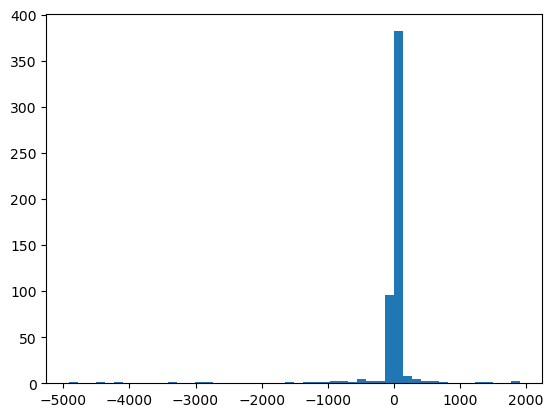

In [205]:
plt.hist(econ_eval_df["return"],bins = 50)
plt.show()

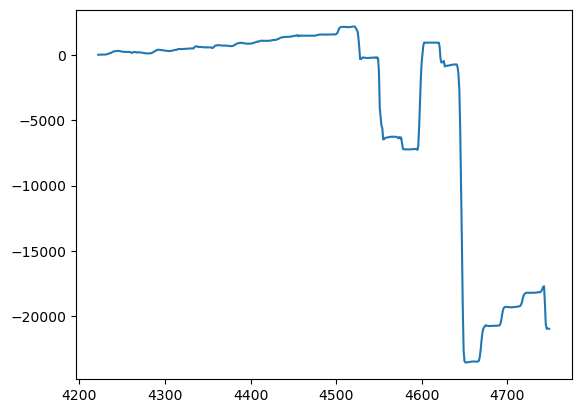

In [206]:
plt.plot(econ_eval_df["cumreturn"])

In [207]:
# calculate max drawdown with max of (cumulative max of cumulativeReturn minus current cumulativeReturn)
max_drawdown = np.max(econ_eval_df["cumreturn"].cummax()-econ_eval_df["cumreturn"])
max_drawdown

25697.51

Max drawdown of 25697.51

In [208]:
np.percentile(econ_eval_df["return"],5)

-169.6763749999999

hourly 95 percentile VAR of -169.67

Conclusion: still really bad.

Partial year not enough data to train and backtest on, need a full year to even experience all the seasons.

Remember caveats, assumptions:

Assume no price convergence

Remember to time and save long operations/training.

Make functions